In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
path = 'C:\\Users\\ashri\\Machine Learning\\ML\\7_logistic_reg\\Exercise\\HR_comma_sep.csv'
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

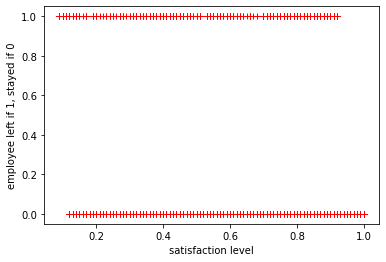

In [5]:
plt.xlabel('satisfaction level')
plt.ylabel('employee left if 1, stayed if 0')

plt.plot(df.satisfaction_level, df.left, 'r+')

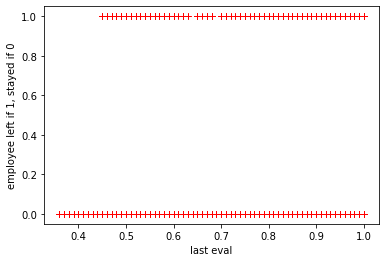

In [6]:
plt.xlabel('last eval')
plt.ylabel('employee left if 1, stayed if 0')

plt.plot(df.last_evaluation, df.left, 'r+')

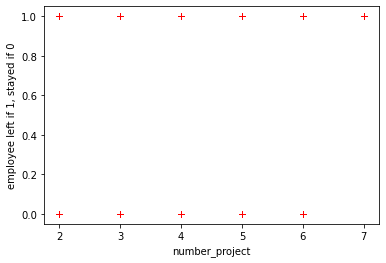

In [7]:
plt.xlabel('number_project')
plt.ylabel('employee left if 1, stayed if 0')

plt.plot(df.number_project, df.left, 'r+')

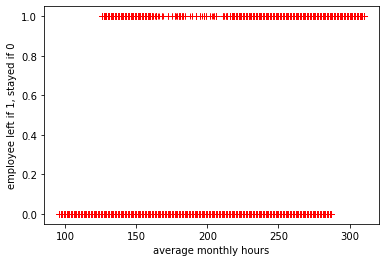

In [9]:
plt.xlabel('average monthly hours')
plt.ylabel('employee left if 1, stayed if 0')

plt.plot(df.average_montly_hours, df.left, 'r+')

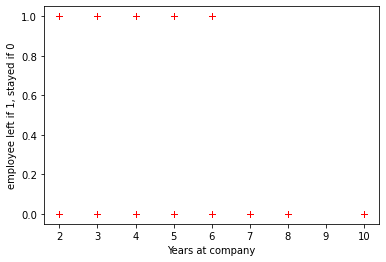

In [10]:
plt.xlabel('Years at company')
plt.ylabel('employee left if 1, stayed if 0')

plt.plot(df.time_spend_company, df.left, 'r+')

In [14]:
left = df[df.left==1]
left.shape

(3571, 10)

In [16]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [17]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

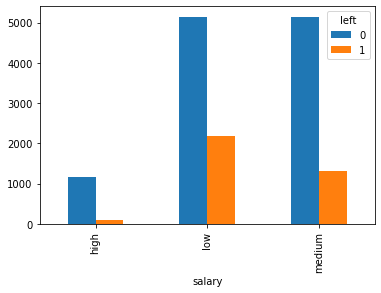

In [19]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

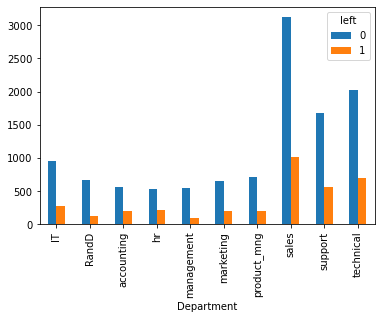

In [20]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [22]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [23]:
pd_with_dummies = pd.get_dummies(subdf.salary , prefix = 'salary')

In [24]:
df_with_dummies = pd.concat([subdf, pd_with_dummies], axis = 'columns')

In [25]:
df_with_dummies.drop('salary', axis = 'columns', inplace = True)

In [26]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [27]:
y = df.left

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_with_dummies, y, test_size=0.1)

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ashri\anaconda3\envs\TensorflowMachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
model.score(x_test, y_test)

0.7686666666666667